In [2]:
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
from collections import defaultdict, Counter
from scipy import signal
import numpy as np
import librosa
import random as rn
from keras.layers import Dense
from keras import Input
from keras.engine import Model
from keras import optimizers
from keras.utils import to_categorical
from keras.layers import Dense, TimeDistributed, Dropout, Bidirectional, GRU, BatchNormalization, Activation, LeakyReLU, LSTM, Flatten, RepeatVector, Permute, Multiply, Conv2D, MaxPooling2D

In [3]:
DATA_DIR = 'C:/Users/JLK/Downloads/free-spoken-digit-dataset-master/recordings/'
#DATA_DIR = 'C:/Users/JLK/requirements/recordings/'

In [4]:
test_speaker = 'theo'
train_X = []
train_spectrograms = []
train_mel_spectrograms = []
train_mfccs = []
train_y = []

test_X = []
test_spectrograms = []
test_mel_spectrograms = []
test_mfccs = []
test_y = []

pad1d = lambda a, i: a[0: i] if a.shape[0] > i else np.hstack((a, np.zeros(i - a.shape[0])))
pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i - a.shape[1]))))
#STFT한 것, CNN분석하기 위해 Spectogram으로 만든 것, MF한 것, mel-spectogram한 것

for fname in os.listdir(DATA_DIR):
    try:
        if '.wav' not in fname or 'dima' in fname:
            continue
        struct = fname.split('_')
        digit = struct[0]
        speaker = struct[1]
        wav, sr = librosa.load(DATA_DIR + fname)
        padded_x = pad1d(wav, 30000)
        spectrogram = np.abs(librosa.stft(wav))
        padded_spectogram = pad2d(spectrogram, 40)
        
        mel_spectogram = librosa.feature.melspectrogram(wav)
        padded_mel_spectrogram = pad2d(mel_spectogram, 40)
        
        mfcc = librosa.feature.mfcc(wav)
        padded_mfcc = pad2d(mfcc, 40)
        
        if speaker == test_speaker:
            test_X.append(padded_x)
            test_spectrograms.append(padded_spectogram)
            test_mel_spectrograms.append(padded_mel_spectrogram)
            test_mfccs.append(padded_mfcc)
            test_y.append(digit)
        else:
            train_X.append(padded_x)
            train_spectrograms.append(padded_spectogram)
            train_mel_spectrograms.append(padded_mel_spectrogram)
            train_mfccs.append(padded_mfcc)
            train_y.append(digit)
    except Exception as e:
        print(fname, e)
        raise
        
train_X = np.vstack(train_X)
train_spectrograms = np.array(train_spectrograms)
train_mel_spectrograms = np.array(train_mel_spectrograms)
train_mfccs = np.array(train_mfccs)
train_y = to_categorical(np.array(train_y))

test_X = np.vstack(test_X)
test_spectrograms = np.array(test_spectrograms)
test_mel_spectrograms = np.array(test_mel_spectrograms)
test_mfccs = np.array(test_mfccs)
test_y = to_categorical(np.array(test_y))

print('train_X:', train_X.shape)
print('train_spectrograms:', train_spectrograms.shape)
print('train_mel_spectrograms', train_mel_spectrograms.shape)
print('train_mfccs', train_mfccs.shape)
print('train_y', train_y.shape)

print('test_X', test_X.shape)
print('test_spectrograms', test_spectrograms.shape)
print('test_mel_spectrograms', test_mel_spectrograms.shape)
print('test_mfccs', test_mfccs.shape)
print('test_y', test_y.shape)

train_X: (2500, 30000)
train_spectrograms: (2500, 1025, 40)
train_mel_spectrograms (2500, 128, 40)
train_mfccs (2500, 20, 40)
train_y (2500, 10)
test_X (500, 30000)
test_spectrograms (500, 1025, 40)
test_mel_spectrograms (500, 128, 40)
test_mfccs (500, 20, 40)
test_y (500, 10)


In [5]:
ip = Input(shape=(train_X[0].shape))
hidden = Dense(128, activation='relu')(ip)
op = Dense(10, activation='softmax')(hidden)
model = Model(ip, op)

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30000)]           0         
_________________________________________________________________
dense (Dense)                (None, 128)               3840128   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,841,418
Trainable params: 3,841,418
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit(train_X,
                   train_y,
                   epochs=10,
                   batch_size=32,
                   validation_data=(test_X, test_y))

Epoch 1/10
79/79 [==============================] - 1s 16ms/step - loss: 2.3066 - accuracy: 0.1604 - val_loss: 2.2981 - val_accuracy: 0.1780
Epoch 2/10
79/79 [==============================] - 1s 14ms/step - loss: 1.6916 - accuracy: 0.5384 - val_loss: 2.2981 - val_accuracy: 0.1620
Epoch 3/10
79/79 [==============================] - 1s 14ms/step - loss: 1.2480 - accuracy: 0.6868 - val_loss: 2.3077 - val_accuracy: 0.1480
Epoch 4/10
79/79 [==============================] - 1s 14ms/step - loss: 0.9528 - accuracy: 0.7716 - val_loss: 2.3133 - val_accuracy: 0.1520
Epoch 5/10
79/79 [==============================] - 1s 14ms/step - loss: 0.7363 - accuracy: 0.8324 - val_loss: 2.3377 - val_accuracy: 0.1560
Epoch 6/10
79/79 [==============================] - 1s 14ms/step - loss: 0.5980 - accuracy: 0.8672 - val_loss: 2.3507 - val_accuracy: 0.1620
Epoch 7/10
79/79 [==============================] - 1s 14ms/step - loss: 0.5085 - accuracy: 0.8944 - val_loss: 2.3646 - val_accuracy: 0.1540
Epoch 8/10
79

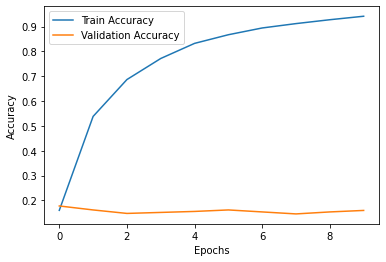

In [7]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [8]:
train_X_ex = np.expand_dims(train_mfccs, -1)
test_X_ex = np.expand_dims(test_mfccs, -1)
print('train X shape:', train_X_ex.shape)
print('test X shape:', test_X_ex.shape)

train X shape: (2500, 20, 40, 1)
test X shape: (500, 20, 40, 1)


In [9]:
ip = Input(shape=train_X_ex[0].shape)
m = Conv2D(64, kernel_size=(4,4), activation='relu')(ip)
m = MaxPooling2D(pool_size=(4,4))(m)


m=Flatten()(m)
m=Dense(32, activation='relu')(m)
op=Dense(10, activation='softmax')(m)

model = Model(ip, op)

model.summary()


Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 20, 40, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 17, 37, 64)        1088      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 9, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                73760     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 75,178
Trainable params: 75,178
Non-trainable params: 0
__________________________________________________

In [10]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit(train_X_ex,
                    train_y,
                    epochs=100,
                    batch_size=32,
                    verbose=1,
                    validation_data=(test_X_ex, test_y))

Epoch 1/100
79/79 [==============================] - 1s 8ms/step - loss: 3.7851 - accuracy: 0.1056 - val_loss: 2.3271 - val_accuracy: 0.1020
Epoch 2/100
79/79 [==============================] - 0s 6ms/step - loss: 2.2581 - accuracy: 0.1228 - val_loss: 2.3018 - val_accuracy: 0.1140
Epoch 3/100
79/79 [==============================] - 0s 6ms/step - loss: 2.2428 - accuracy: 0.1288 - val_loss: 2.2964 - val_accuracy: 0.1060
Epoch 4/100
79/79 [==============================] - 0s 6ms/step - loss: 2.2139 - accuracy: 0.1432 - val_loss: 2.2428 - val_accuracy: 0.1300
Epoch 5/100
79/79 [==============================] - 0s 6ms/step - loss: 2.2054 - accuracy: 0.1440 - val_loss: 2.2454 - val_accuracy: 0.1300
Epoch 6/100
79/79 [==============================] - 0s 6ms/step - loss: 2.1825 - accuracy: 0.1488 - val_loss: 2.2377 - val_accuracy: 0.1320
Epoch 7/100
79/79 [==============================] - 0s 6ms/step - loss: 2.1588 - accuracy: 0.1600 - val_loss: 2.1767 - val_accuracy: 0.1700
Epoch 8/100
7

Epoch 59/100
79/79 [==============================] - 0s 6ms/step - loss: 1.5784 - accuracy: 0.3004 - val_loss: 1.8175 - val_accuracy: 0.2240
Epoch 60/100
79/79 [==============================] - 0s 6ms/step - loss: 1.5828 - accuracy: 0.3012 - val_loss: 1.7802 - val_accuracy: 0.2640
Epoch 61/100
79/79 [==============================] - 0s 6ms/step - loss: 1.5834 - accuracy: 0.3000 - val_loss: 1.7657 - val_accuracy: 0.2460
Epoch 62/100
79/79 [==============================] - 0s 6ms/step - loss: 1.6042 - accuracy: 0.3020 - val_loss: 1.9378 - val_accuracy: 0.2000
Epoch 63/100
79/79 [==============================] - 0s 6ms/step - loss: 1.6478 - accuracy: 0.2812 - val_loss: 1.7883 - val_accuracy: 0.2480
Epoch 64/100
79/79 [==============================] - 0s 6ms/step - loss: 1.5916 - accuracy: 0.2872 - val_loss: 1.7952 - val_accuracy: 0.2280
Epoch 65/100
79/79 [==============================] - 0s 6ms/step - loss: 1.5921 - accuracy: 0.2976 - val_loss: 1.7668 - val_accuracy: 0.2400
Epoch 

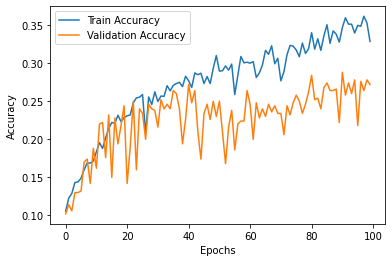

In [11]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()